In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
## 1
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## 2
import sys
sys.path.append("/home/paperspace/fastai/")

In [3]:
# This file contains all the main external libs we'll use
## 3
from fastai.imports import *

In [4]:
## 4
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
## 5
PATH = "../data/"
sz=224
arch = resnext101_64
bs=64

In [6]:
## 6
torch.cuda.is_available()

True

In [7]:
## 7
torch.backends.cudnn.enabled

True

In [8]:
os.listdir(PATH)

['val.tar',
 'train_info.csv',
 'train_set1',
 'train_set',
 'test_set',
 'train2_info.csv',
 'test.tar',
 'val_info.csv',
 'test_info.csv',
 'train_set2',
 'models',
 'val_set',
 'train.tar',
 'tmp',
 'annot.tar']

In [12]:
f'{PATH}train_set1'

'../data/train_set1'

In [16]:
files = os.listdir(f'{PATH}train_set1/')
files.sort()
files[-5:-1]

['val_010318.jpg', 'val_010319.jpg', 'val_010320.jpg', 'val_010321.jpg']

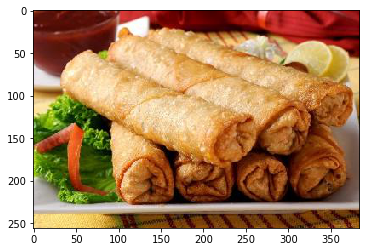

In [18]:
img = plt.imread(f'{PATH}train_set1/{files[4]}')
plt.imshow(img);

In [19]:
img.shape

(256, 384, 3)

In [20]:
img[:4,:4]

array([[[219, 130, 100],
        [207, 118,  88],
        [186,  99,  71],
        [167,  80,  52]],

       [[181,  94,  64],
        [172,  85,  57],
        [160,  73,  45],
        [147,  61,  34]],

       [[142,  56,  29],
        [138,  52,  25],
        [131,  45,  18],
        [126,  42,  16]],

       [[125,  41,  15],
        [122,  38,  14],
        [117,  35,  11],
        [115,  33,  11]]], dtype=uint8)

In [9]:
!ls ../data

annot.tar      test_set  train2_info.csv  train_set1  val_info.csv
models	       test.tar  train_info.csv   train_set2  val_set
test_info.csv  tmp	 train_set	  train.tar   val.tar


In [8]:
## 8
train_label_csv = f'{PATH}train_info.csv'
train2_label_csv = f'{PATH}train2_info.csv'
valid_label_csv = f'{PATH}val_info.csv'
test_label_csv = f'{PATH}test_info.csv'


train_label_df = pd.read_csv(train_label_csv, header=None)
valid_label_df = pd.read_csv(valid_label_csv, header=None)
test_label_df = pd.read_csv(test_label_csv, header=None)
train2_label_df = pd.read_csv(train2_label_csv, header=None)

In [32]:
print(train2_label_df.tail())
print("Now Valid")
print(valid_label_df.tail())

                     0    1
112051  val_010318.jpg  172
112052  val_010319.jpg   72
112053  val_010320.jpg  124
112054  val_010321.jpg  109
112055  val_010322.jpg  168
Now Valid
                    0    1
10318  val_010318.jpg  172
10319  val_010319.jpg   72
10320  val_010320.jpg  124
10321  val_010321.jpg  109
10322  val_010322.jpg  168


In [32]:
train_label_df.pivot_table(index=1, aggfunc=len).sort_values(0, ascending=True)

,0
1,
162,34
164,292
103,302
153,313
209,321
159,322
15,327
99,329
174,333


In [38]:
valid_label_df.pivot_table(index=1, aggfunc=len).sort_values(0, ascending=True)

,0
1,
116,2
189,9
99,22
149,22
65,26
159,26
117,29
50,32
191,34


In [45]:
train2_label_df.pivot_table(index=1, aggfunc=len).sort_values(0, ascending=True)

,0
1,
162,83
164,330
103,344
159,348
99,351
209,362
153,370
174,376
15,384


In [11]:

val_idxs

array([101733, 101734, 101735, ..., 112053, 112054, 112055])

In [13]:
!wc -l '{PATH}train2_info.csv'

112056 ../data/train2_info.csv


In [50]:
print(len(val_idxs))
print(len(valid_label_df))


10323
10323


In [9]:
## 9
val_idxs = np.arange(len(train_label_df), len(train2_label_df))
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train_set1', f'{PATH}train2_info.csv', test_name='test_set', val_idxs=val_idxs, tfms=tfms, bs=bs, skip_header=False)
    return data 

data = get_data(sz,bs)

In [10]:

fn = PATH + data.val_ds.fnames[-1]; fn

'../data/train_set1/val_010322.jpg'

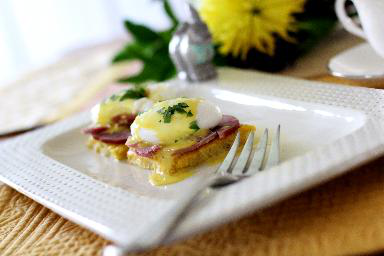

In [11]:
img = PIL.Image.open(fn); img


In [80]:
img.size


(384, 256)

In [81]:
len(data.trn_ds), len(data.test_ds)

(101733, 24088)

In [82]:
len(data.classes), data.classes[:7]

(211, ['0', '1', '10', '100', '101', '102', '103'])

In [10]:
## 10
learn = ConvLearner.pretrained(arch,data, precompute=True, opt_fn=optim.Adam)

In [13]:
## 11
lrf=learn.lr_find()

 68%|██████▊   | 1081/1590 [00:40<00:18, 27.02it/s, loss=14.1]

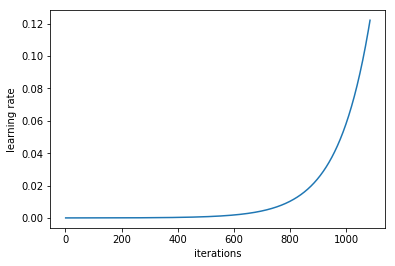

In [14]:
learn.sched.plot_lr()


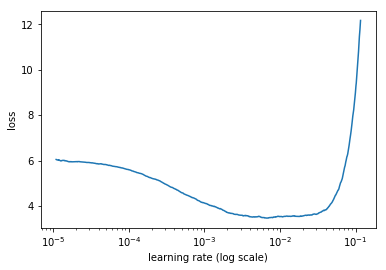

In [15]:
## 12
learn.sched.plot()

In [11]:
## 13
def accuracytop3(preds, targs):
    preds_3 = preds.sort(dim=1, descending=True)[1][:, :3]
    return ((preds_3[:, 0] == targs) + (preds_3[:, 1] == targs) + (preds_3[:, 2] == targs)).float().mean()
    

In [12]:
## 14
learn.fit(0.005, 3, cycle_len=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      2.666599   2.002753   0.518454   0.717136  
    1      2.359898   1.824413   0.552456   0.743292          
    2      2.45069    1.882837   0.541994   0.737092          
    3      2.181104   1.746325   0.566793   0.759954          
    4      2.359976   1.803737   0.555459   0.75046           
    5      2.108811   1.70771    0.572895   0.7647            



[array([1.70771]), 0.5728954761270565, 0.7647001840492488]

In [14]:
## 15
learn.fit(0.001, 2, cycle_len=2, cycle_mult=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      1.993341   1.685793   0.582679   0.767122  
    1      1.959355   1.670936   0.582195   0.771287          
    2      2.006082   1.677072   0.580645   0.772353          
    3      1.93356    1.669112   0.580548   0.771481          
    4      1.821008   1.645237   0.587814   0.774484          
    5      1.790761   1.640719   0.585586   0.773806          



[array([1.64072]), 0.5855855855769246, 0.7738060641228708]

In [28]:
lrf=learn.lr_find()

 64%|██████▎   | 1011/1590 [00:30<00:17, 33.70it/s, loss=6.91]

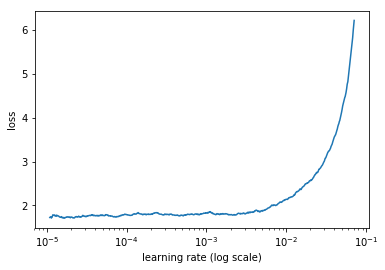

In [29]:
learn.sched.plot()


In [13]:
## 16_1
learn.fit(0.001, 1, cycle_len=4, cycle_mult=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      2.060613   1.710429   0.571539   0.764991  
    1      1.980348   1.667591   0.578611   0.770609          
    2      1.885905   1.657613   0.583551   0.772256          
    3      1.881305   1.657291   0.581226   0.771869          



[array([1.65729]), 0.5812263876982094, 0.7718686428306109]

In [31]:
## 16_2
learn.fit(0.001, 1, cycle_len=4, cycle_mult=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      1.807856   1.664881   0.585101   0.770125  
    1      1.782233   1.636398   0.589654   0.776034          
    2      1.679023   1.629238   0.589848   0.776518          
    3      1.618418   1.636153   0.589267   0.776325          


[array([1.63615]), 0.5892666860466536, 0.776324711762391]

In [16]:
## Optional. Doesnt Help Much
learn.set_data(get_data(299,bs))

In [17]:
learn.fit(0.001, 1, cycle_len=4, cycle_mult=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      1.835413   1.651414   0.585295   0.773709  
    1      1.767573   1.633451   0.588395   0.7771            
    2      1.682997   1.629535   0.584811   0.77739           
    3      1.682242   1.629647   0.587426   0.777293          



[array([1.62965]), 0.5874261357901367, 0.7772934224778086]

In [32]:
## 17
import torch

In [19]:
## 18
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
b = torch.from_numpy(probs)
c = torch.from_numpy(y)
accuracytop3(b, c)

0.7776809067131648

In [37]:
## Dont Run
def unfreeze_new(self, num_from_last):
    """ Unfreeze all layers.

    Make all layers trainable by unfreezing. This will also set the `precompute` to `False` since we can
    no longer pre-calculate the activation of frozen layers.

    Returns:
        None
    """
    self.freeze_to(-1*num_from_last)
    self.precompute = False

In [42]:
from fastai.conv_learner import *

In [14]:
## 19
learn.unfreeze()
learn.bn_freeze(True) 

In [15]:
## 20
lr = np.array([0.00001, 0.0001, 0.001])

In [35]:
learn.set_data(get_data(224,bs/2))

In [16]:
## 21
learn.fit(lr, 1, cycle_len=1, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      2.092632   1.652546   0.585682   0.772159  



[array([1.65255]), 0.5856824566848424, 0.7721592560244498]

In [ ]:
learn.fit(lr, 1, cycle_len=3, metrics=[accuracy, accuracytop3])

In [18]:
## 22
learn.fit(lr, 1, cycle_len=3, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      2.081097   1.64224    0.585876   0.7771    
    1      1.970441   1.616895   0.59101    0.779521          
    2      1.947525   1.610686   0.59256    0.780878          


[array([1.61069]), 0.5925603022579304, 0.7808776517992021]

In [19]:
## 23
learn.save('resNext101_64_RanUnfreezeNicely')

In [30]:
## 24
learn.freeze()

In [29]:
## 25
learn.precompute=True

In [22]:
## 26
def accuracytop5(preds, targs):
    preds_5 = preds.sort(dim=1, descending=True)[1][:, :5]
    return ((preds_5[:, 0] == targs) + (preds_5[:, 1] == targs) + (preds_5[:, 2] == targs) + (preds_5[:, 3] == targs) + (preds_5[:, 4] == targs)).float().mean()

In [31]:
## 27
learn.fit(1e-4, 1, cycle_len=1, metrics=[accuracy, accuracytop3, accuracytop5])

epoch      trn_loss   val_loss   accuracy   accuracytop3 accuracytop5 
    0      1.715778   1.60886    0.592948   0.781071   0.839872  


[array([1.60886]), 0.5929477865163825, 0.7810713939284281, 0.8398721302178067]

In [33]:
## 28 -- STOP
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
b = torch.from_numpy(probs)
c = torch.from_numpy(y)
accuracytop5(b, c)

0.8401627433885498

In [34]:
learn.unfreeze()
learn.bn_freeze(True) 

In [38]:
## DONT :P Will Regret
lr = np.array([0.0005, 0.005, 0.05])

In [40]:
learn.fit(lr, 1, cycle_len=3, metrics=[accuracy, accuracytop3, accuracytop5])

 24%|██▍       | 382/1590 [05:13<16:32,  1.22it/s, loss=5.98]

KeyboardInterrupt: 

In [16]:
learn.load('resNext101_64_bs64_sz224_all_Freezed')

In [17]:
learn.freeze()

In [18]:
learn.precompute=True

In [19]:
learn.fit(0, 1, cycle_len=1, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      1.728201   1.650081   0.59072    0.773322  


[array([1.65008]), 0.5907197520302835, 0.7733217088286757]

In [20]:
lrf=learn.lr_find()


 81%|████████▏ | 1292/1590 [00:40<00:09, 32.30it/s, loss=6.81]

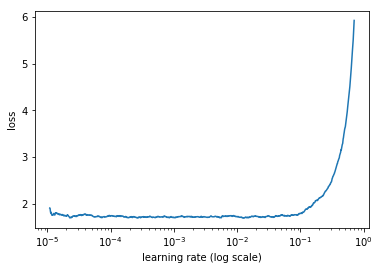

In [21]:
learn.sched.plot()

In [22]:
learn.unfreeze()

In [24]:
lrf=learn.lr_find()


  0%|          | 0/1590 [00:00<?, ?it/s]

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

In [ ]:
learn.fit(0, 1, cycle_len=1, metrics=[accuracy, accuracytop3])

In [23]:
learn.fit(0.05, 1, cycle_len=2, metrics=[accuracytop3])

epoch      trn_loss   val_loss   accuracytop3                 
    0      2.497181   1.884423   0.737964  
    1      2.233753   1.79446    0.749491                     


[array([1.79446]), 0.7494914269050078]

In [24]:
learn.fit(0.001, 1, cycle_len=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      2.147344   1.792615   0.561368   0.751719  
    1      2.094263   1.784535   0.56253    0.751332          


[array([1.78454]), 0.5625302721990306, 0.7513319771326548]

In [29]:
!ls ../data/tmp/


340			      x_act_test_resnext101_64_0_224.bc
x_act_resnet34_0_224.bc       x_act_test_resnext50_0_224.bc
x_act_resnext101_64_0_224.bc  x_act_val_resnet34_0_224.bc
x_act_resnext50_0_224.bc      x_act_val_resnext101_64_0_224.bc
x_act_test_resnet34_0_224.bc  x_act_val_resnext50_0_224.bc


In [33]:
learn.load('resNext101_64_bs64_sz224_all')

In [34]:
learn.freeze()

In [35]:
learn.save('resNext101_64_bs64_sz224_all_Freezed')

In [36]:
learn.fit(0.001, 1, cycle_len=2, metrics=[accuracy, accuracytop3])

  0%|          | 0/1590 [00:00<?, ?it/s]

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

In [31]:
learn.unfreeze()

In [32]:
lr=np.array([0.0005, 0.005, 0.05])

In [96]:
learn.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                     
    0      2.098889   1.641074   0.589267  
    1      2.077292   1.635444   0.590139                     


[array([1.63544]), 0.5901385256570404]

In [99]:
learn.save('resNext101_64_bs64_sz224_all')

In [104]:
!ls ../data/models/


resNext101_64_bs64_sz224_all.h5  tmp.h5
